In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df_aw_custs = pd.read_csv('./AdvWorksCusts.csv')
df_aw_spend = pd.read_csv('./AW_AveMonthSpend.csv')

In [3]:
print(df_aw_custs.head())
print(df_aw_spend.head())

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional   

In [4]:
print(df_aw_spend.describe())
print(df_aw_spend.shape)
print(df_aw_spend.CustomerID.unique().shape)

         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000
(16519, 2)
(16404,)


In [5]:
df_aw_spend.drop_duplicates(inplace=True, keep='last', subset="CustomerID")


In [6]:
df_aw_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [7]:
print(df_aw_custs.shape)
print(df_aw_custs.CustomerID.unique().shape)

(16519, 23)
(16404,)


In [8]:
df_aw_custs.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

In [9]:
df_aw_custs[["YearlyIncome", "Occupation"]].groupby("Occupation").median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99058.0
Skilled Manual,66471.5


In [10]:
df_aw_spend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [11]:
df_aw_custs.set_index("CustomerID", inplace=True)
df_aw_spend.set_index("CustomerID", inplace=True)

In [12]:
print(df_aw_spend.head())
df_joined = df_aw_custs.join(df_aw_spend)
print(df_joined[["AveMonthSpend"]].head())

            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95
            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95


In [13]:
def age_group(age):
    if age < 25:
        return "<25"
    elif age < 45:
        return "25-45"
    elif age < 55:
        return "45-55"
    else:
        return ">=55"

In [14]:
def process_age(data):
    data["Age"] = (pd.Timestamp("1998-01-01") - pd.to_datetime(data["BirthDate"])).astype('<m8[Y]').astype("int")
    data["AgeGroup"] = data["Age"].map(age_group)
process_age(df_joined)

In [15]:
print(df_joined.columns)
df_joined[["Gender", "AveMonthSpend", "BirthDate"]]
df_joined.dtypes

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'Age', 'AgeGroup'],
      dtype='object')


Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
Age                      int32
AgeGroup                object
dtype: object

In [16]:
df_joined["AgeGroup"] = df_joined["Age"].map(age_group)

In [17]:
df_joined.dtypes

Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
Age                      int32
AgeGroup                object
dtype: object

In [18]:
df_joined = df_joined[["Age","AgeGroup","YearlyIncome", "Education", "Occupation", "Gender", "MaritalStatus","HomeOwnerFlag","NumberCarsOwned","NumberChildrenAtHome","TotalChildren","AveMonthSpend"]]

In [19]:
import sklearn.metrics as sklm
import sklearn.decomposition as skde

In [20]:
df_joined["HomeOwnerFlag"] = df_joined["HomeOwnerFlag"].astype("category")
df_joined["MaritalStatus"] = df_joined["MaritalStatus"].astype("category")


In [21]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].groupby(["AgeGroup", "Gender"]).describe()

AveMonthSpend                                                  \
                        count       mean        std   min   25%   50%     75%   
AgeGroup Gender                                                                 
25-45    F             4914.0  59.814611  16.599226  32.0  48.0  54.0   67.00   
         M             5067.0  93.367278  27.378939  50.0  75.0  83.0  107.00   
45-55    F             1210.0  57.916529  16.933641  29.0  47.0  53.0   61.00   
         M             1227.0  89.334148  27.229150  51.0  71.0  82.0   95.00   
<25      F             1456.0  48.403846  11.892605  30.0  42.0  46.0   51.00   
         M             1476.0  72.955962  18.502554  50.0  63.0  69.0   76.25   
>=55     F              534.0  46.694757  11.965024  22.0  40.0  45.0   49.00   
         M              520.0  72.490385  19.671775  29.0  62.0  69.0   75.00   

                        
                   max  
AgeGroup Gender         
25-45    F       114.0  
         M       176.0  
45-55    F       110.0  
         M       170.0  
<25      F       112.0  
         M       176.0  
>=55     F        93.0  
         M       147.0

In [22]:
def plot_box(data, cols_x, col_y = 'AveMonthSpend', hue = "Gender"):
    for col_x in cols_x:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col_y, data=data, palette='RdBu_r', hue = hue)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        

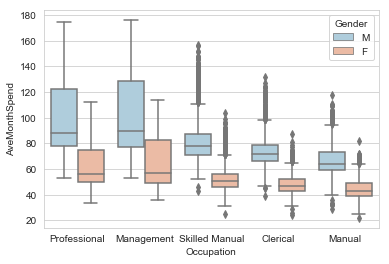

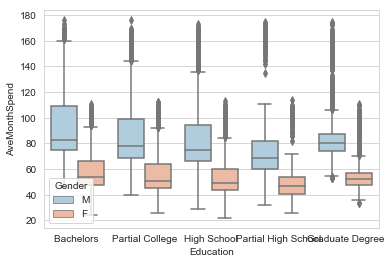

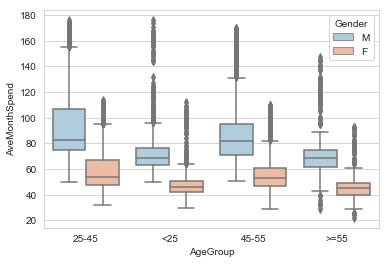

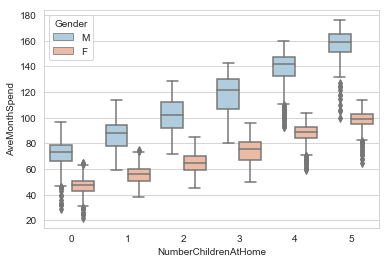

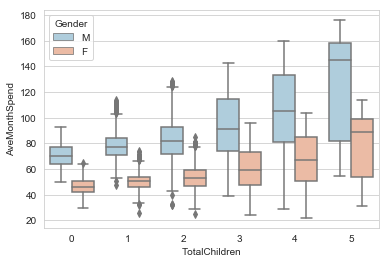

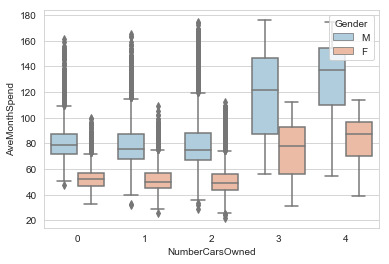

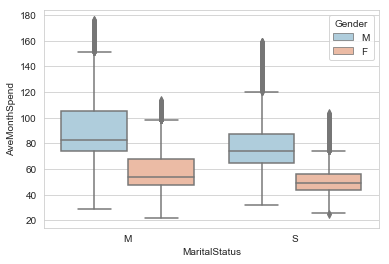

In [23]:
cols = ["Occupation","Education", "AgeGroup", "NumberChildrenAtHome", "TotalChildren", "NumberCarsOwned", "MaritalStatus"]
plot_box(df_joined, cols)

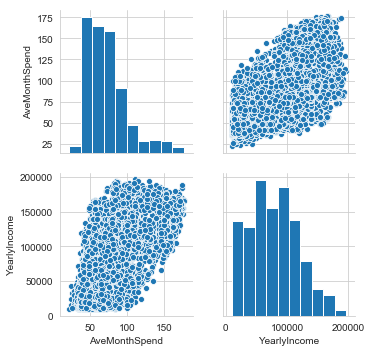

In [24]:
sns.pairplot(df_joined[["AveMonthSpend", "YearlyIncome"]])

In [25]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [26]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [27]:
print(df_joined.head())
print(df_joined.columns)


            Age AgeGroup  YearlyIncome   Education    Occupation Gender  \
CustomerID                                                                
11000        31    25-45        137947  Bachelors   Professional      M   
11001        32    25-45        101141  Bachelors   Professional      M   
11002        32    25-45         91945  Bachelors   Professional      M   
11003        29    25-45         86688  Bachelors   Professional      F   
11004        29    25-45         92771  Bachelors   Professional      F   

           MaritalStatus HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
CustomerID                                                                      
11000                  M             1                0                     0   
11001                  S             0                1                     3   
11002                  M             1                1                     3   
11003                  S             0                1              

In [28]:
labels = np.array(df_joined['AveMonthSpend'])

In [29]:
df_joined[["YearlyIncome","MaritalStatus", "Gender", "NumberCarsOwned", "Age", "AveMonthSpend"]].head()

,YearlyIncome,MaritalStatus,Gender,NumberCarsOwned,Age,AveMonthSpend
CustomerID,,,,,,
11000,137947,M,M,0,31,89
11001,101141,S,M,1,32,117
11002,91945,M,M,1,32,123
11003,86688,S,F,1,29,50
11004,92771,S,F,4,29,95


In [30]:
cols = ["MaritalStatus", "Gender"]
encoded = encode_string(cat_features=cols)


In [31]:
encoded

array([[0., 1.],
       [1., 0.]])

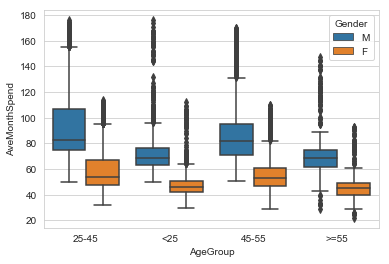

In [32]:
sns.boxplot(data=df_joined[["AgeGroup", "AveMonthSpend", "Gender"]], y="AveMonthSpend", x="AgeGroup", hue="Gender")

In [33]:
def build_features_array(data, enc_cols, no_enc_cols):
    features = np.empty((len(data),0))
    print(features.shape)
    cols_encoded = 0
    for col in enc_cols:
        encoded = encode_string(data[col])
        features = np.concatenate([features, encoded], axis = 1)
        print(features.shape)
    cols_encoded = features.shape[1]
    features = np.concatenate([features, np.array(data[no_enc_cols])], axis = 1)
    print(features.shape)
    return (features, cols_encoded)


In [34]:
enc_cols = ['Gender', 'Occupation', 'Education', 'MaritalStatus']
no_enc_cols = ["YearlyIncome", "NumberChildrenAtHome", "TotalChildren", "Age"]
Features, cols_encoded = build_features_array(df_joined, enc_cols, no_enc_cols)

(16404, 0)
(16404, 2)
(16404, 7)
(16404, 12)
(16404, 14)
(16404, 18)


In [35]:
Features[:20, :]

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.37947e+05,
        0.00000e+00, 2.00000e+00, 3.10000e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.01141e+05,
        3.00000e+00, 3.00000e+00, 3.20000e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 9.19450e+04,
        3.00000e+00, 3.00000e+00, 3.20000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.0000

In [36]:
nr.seed(9988)
size = (int(Features.shape[0] * 0.3))
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = size)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:10]

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 4.70040e+04,
        0.00000e+00, 1.00000e+00, 4.20000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 7.57340e+04,
        0.00000e+00, 2.00000e+00, 5.50000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 3.65450e+04,
        0.00000e+00, 1.00000e+00, 3.60000e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.0000

In [37]:
scaler = preprocessing.StandardScaler().fit(X_train[:,cols_encoded:])
X_train[:,cols_encoded:] = scaler.transform(X_train[:,cols_encoded:])
X_test[:,cols_encoded:] = scaler.transform(X_test[:,cols_encoded:])
X_train[:10,]

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -7.83482105e-01,
        -6.51805728e-01, -5.95584432e-01,  5.83918184e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00, -5.99959654e-02,
        -6.51805728e-01, -2.37634520e-03,  1.74358987e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00, -1.04686329e

In [38]:
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import math
import scipy.stats as ss

In [39]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

In [40]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')    

In [41]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')

In [42]:
lm_model = linear_model.LinearRegression(fit_intercept=True, n_jobs=10)
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [43]:
y_predict = lm_model.predict(X_test)

In [44]:
y_predict = lm_model.predict(X_test) 
print_metrics(y_test, y_predict, 28)   

Mean Square Error      = 38.81911812102836
Root Mean Square Error = 6.230499026645327
Mean Absolute Error    = 4.781062565884729
Median Absolute Error  = 3.8466796875
R^2                    = 0.9478661400067857
Adjusted R^2           = 0.947578460828405


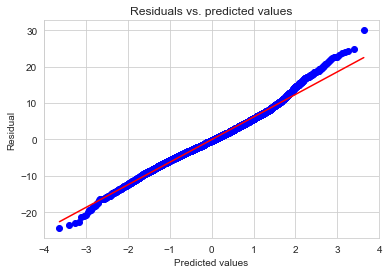

In [45]:
resid_qq(y_test, y_predict) 

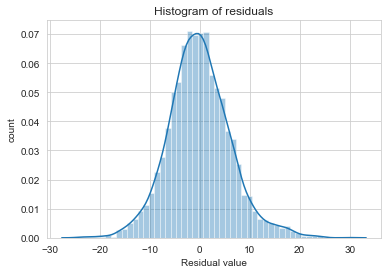

In [46]:
hist_resids(y_test, y_predict) 

In [47]:
from sklearn.neural_network import MLPRegressor

In [48]:
nn_model = MLPRegressor(hidden_layer_sizes=(100,100))
nn_model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [49]:
y_predict_nn = nn_model.predict(X_test) 
print_metrics(y_test, y_predict_nn, 28)   

Mean Square Error      = 9.83640174536938
Root Mean Square Error = 3.136303834989426
Mean Absolute Error    = 2.4820333944693975
Median Absolute Error  = 2.051970456925133
R^2                    = 0.9867897670979726
Adjusted R^2           = 0.9867168718826947


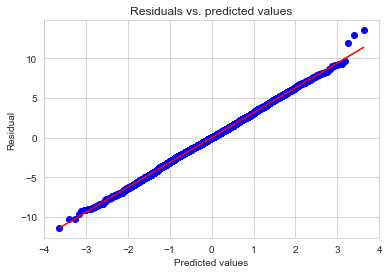

In [50]:
resid_qq(y_test, y_predict_nn) 

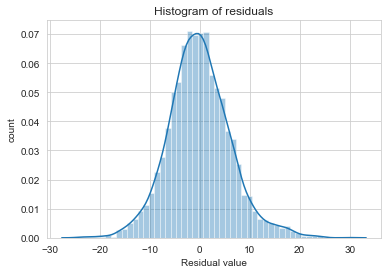

In [51]:
hist_resids(y_test, y_predict) 

In [52]:
pca_model = skde.PCA(n_components=5)
pca_model.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca_model.explained_variance_

array([2.17505839, 1.0486214 , 0.84468165, 0.48790937, 0.46023986])

In [54]:
X_train_pca = pca_model.transform(X_train)


In [55]:
cols_encoded

14

## Running test dataset

In [56]:
df_aw_test = pd.read_csv('./AW_test.csv')
df_aw_test.set_index("CustomerID", inplace=True)

process_age(df_aw_test)
df_aw_test.head()

test_features,_ = build_features_array(df_aw_test, enc_cols, no_enc_cols)

test_features[:,cols_encoded:] = scaler.transform(test_features[:,cols_encoded:])

prob_test = nn_model.predict(test_features)


(500, 0)
(500, 2)
(500, 7)
(500, 12)
(500, 14)
(500, 18)


In [57]:
df_aw_test["AveMonthSpend"] = prob_test


In [59]:
df_aw_test["AveMonthSpend"].to_csv("results_reg_nn.csv")